# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
import os
import matplotlib.image as mpimg

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_test.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_test))
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

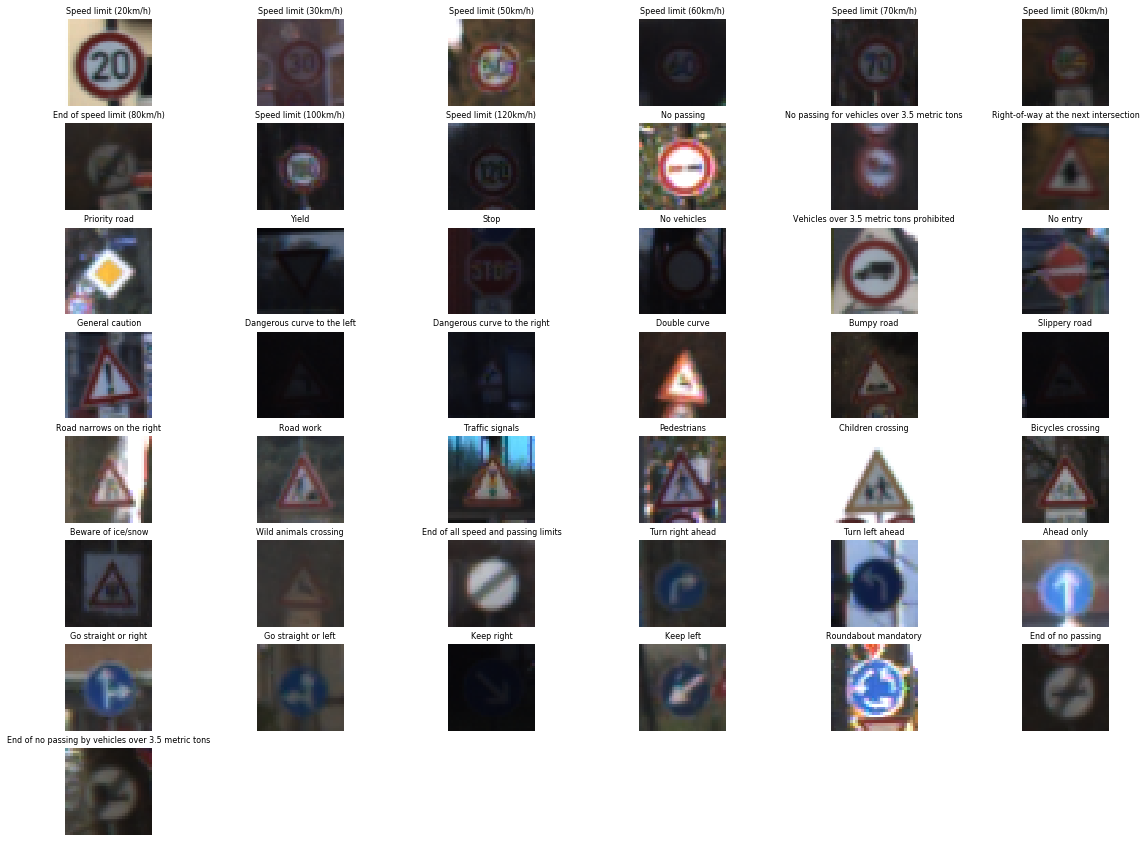

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

import numpy as np
import pandas as pd

# Explore the dataset
signnames = pd.read_csv('signnames.csv')
signnames = np.array(signnames.SignName)
fig = plt.figure(figsize=(20,15))
for i in range(1,n_classes+1):
    fig.add_subplot(8, 6, i)
    image = X_train[y_train==i-1][0]
    plt.title(signnames[i-1],fontsize=8)
    if len(image.shape) == 3:
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
    plt.axis('off') 
plt.show()

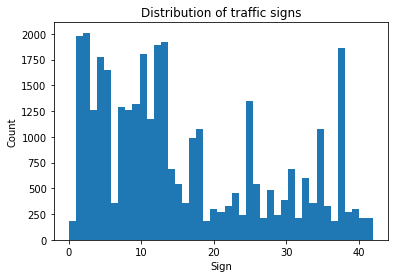

In [52]:
plt.hist(y_train, bins=n_classes)
plt.title('Distribution of traffic signs')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
from PIL import Image 
from skimage import exposure, color
from matplotlib import colors
def process_data(image_data, kernel_size=5):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    : image_data: the image data to be normalized
    : kernel_size: the size of the receptive field 
    : return: a preprocessed image data
    """
    if image_data.shape[1:3] != (32, 32):
        image_data = np.array([cv2.resize(image, (32, 32)) for image in image_data])
        color_channels = image_data.shape[3]
        image_data = np.array([np.reshape(image, (32, 32, color_channels)) for image in image_data])
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    color_channels = image_data.shape[3]
    normalized_data = [a + (((image - grayscale_min)*(b - a))/(grayscale_max - grayscale_min)) for image in image_data]
    gray_images = np.array([color.rgb2gray(image) for image in normalized_data])
    reshaped_data = [np.reshape(image, (32,32,1)) for image in gray_images]
    result = np.array(reshaped_data)
    return result

In [6]:
# Apply the function process_data to training data and validation data
original_X_train = X_train
X_train = process_data(X_train)
X_valid = process_data(X_valid)

In [7]:
# Plot image after grayscale
def plot_gray_img(index, sign_code, X_train=X_train, y_train=y_train, names=signnames, original_X=original_X_train):
    """
    Plot grayscaled image
    : index: the index of a traffic sign in an array
    : sign_code: a number that represents a specific traffic sign
    : X_train: the training dataset
    : y_train: the labels of the training dataset
    : names: the names of traffic signs
    : original_X: the non-processed training dataset
    """
    image = X_train[y_train==sign_code][index]
    original_image = original_X[y_train==sign_code][index]
    fig = plt.figure(figsize=(15,8))
    fig.add_subplot(1, 2, 1)
    plt.title("Grayscaled: " + names[sign_code], fontsize=14)
    plt.imshow(np.reshape(image, (32,32)))
    plt.axis('off')
    fig.add_subplot(1, 2, 2)
    plt.title("Original: " + names[sign_code], fontsize=14)
    plt.imshow(original_image)
    plt.axis('off')
    plt.show()

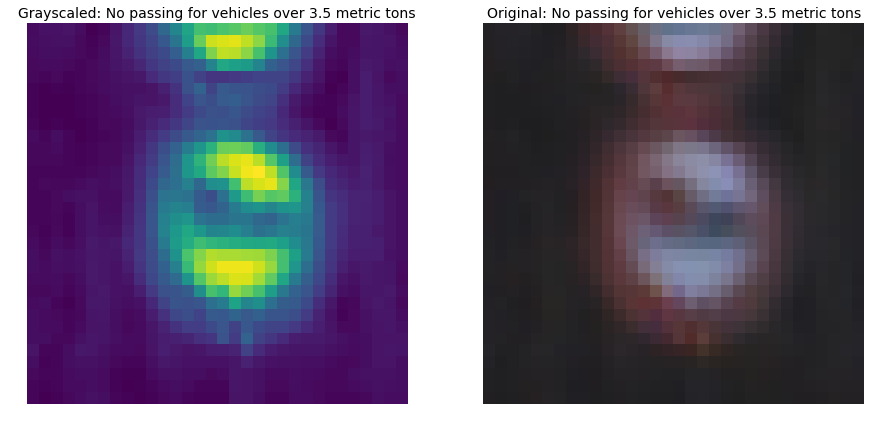

In [8]:
plot_gray_img(0, 10)

### Model Architecture

In [9]:
# Set up Tensorflow
import tensorflow as tf

### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def conv2d_maxpool(x_tensor, conv_output, conv_ksize, conv_strides, pool_ksize, pool_strides, mu, sigma, keep_prob, padding='VALID'):
    """
    Apply convolution then max pooling to x_tensor
    : x_tensor: TensorFlow Tensor
    : conv_output: Number of outputs for the convolutional layer
    : conv_ksize: kernal size 2-D Tuple for the convolutional layer
    : conv_strides: Stride 2-D Tuple for convolution
    : pool_ksize: kernal size 2-D Tuple for pool
    : pool_strides: Stride 2-D Tuple for pool
    : mu: The mean of the truncated normal distribution of the weights
    : sigma: The standard deviation of the truncated normal distribution of the weights
    : padding: The type of padding applied in the convnet
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # Convolutional
    conv_input = x_tensor.get_shape()[3].value
    conv_w = tf.Variable(tf.truncated_normal(shape=(conv_ksize[0], conv_ksize[1], conv_input, conv_output), mean=mu, stddev=sigma))
    conv_b = tf.Variable(tf.zeros(conv_output))
    conv = tf.nn.bias_add(tf.nn.conv2d(x_tensor, conv_w, strides=[1, conv_strides[0], conv_strides[1], 1], padding=padding), conv_b)
    # Activation
    conv = tf.nn.relu(conv)
    # Pooling
    conv = tf.nn.max_pool(conv, ksize=[1, pool_ksize[0], pool_ksize[1], 1], strides=[1, pool_strides[0], pool_strides[1], 1], padding=padding)
    # Drop out
    conv = tf.nn.dropout(conv, keep_prob)
    return conv

def fully_con(x_tensor, num_outputs, mu, sigma, keep_prob):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : mu: The mean of the truncated normal distribution of the weights
    : sigma: The standard deviation of the truncated normal distribution of the weights
    : keep_prob: Placeholder tensor that holds dropout keep probability.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # Convolutional
    num_inputs = x_tensor.get_shape()[1].value
    fc_w = tf.Variable(tf.truncated_normal(shape=(num_inputs, num_outputs), mean=mu, stddev=sigma))
    fc_b = tf.Variable(tf.zeros(num_outputs))
    fc = tf.nn.bias_add(tf.matmul(x_tensor, fc_w), fc_b)
    # Activation
    fc = tf.nn.relu(fc)
    # Drop out
    fc = tf.nn.dropout(fc, keep_prob)
    return fc

def output_conv(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    num_inputs = x_tensor.get_shape()[1].value
    fc_w = tf.Variable(tf.truncated_normal(shape=(num_inputs, num_outputs)))
    fc_b = tf.Variable(tf.zeros(num_outputs))
    output = tf.nn.bias_add(tf.matmul(x_tensor, fc_w), fc_b)
    return output


In [42]:
##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
color_channels = X_train.shape[3]
x = tf.placeholder(tf.float32, (None, 32, 32, color_channels), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
fc_keep_prob = tf.placeholder(tf.float32, name='fc_keep_prob')
conv_keep_prob = tf.placeholder(tf.float32, name='conv_keep_prob')
one_hot_y = tf.one_hot(y, 43)

### Create a convolutional neural network
mu = 0
sigma = 0.05
rate = 0.0001
fc_keep_probability = 0.8
conv_keep_probability = 0.75
# Layer 1: Convolutional. Input = 32x32x1. Output = 14x14x10.
conv1 = conv2d_maxpool(x, 10, (5,5), (1,1), (2,2), (2,2), mu, sigma, conv_keep_prob)

# Layer 2: Convolutional. Output = 5x5x100.
conv2 = conv2d_maxpool(conv1, 100, (5,5), (1,1), (2,2), (2,2), mu, sigma, conv_keep_prob)

# Flatten. Input = 5x5x100. Output = 2500.
flat = flatten(conv2)

# Layer 3: Fully Connected. Input = 2500. Output = 500.
fc1 = fully_con(flat, 500, mu, sigma, fc_keep_prob)

# Layer 4: Fully Connected. Input = 500. Output = 500.
fc2 = fully_con(fc1, 500, mu, sigma, fc_keep_prob)

# Layer 5: Fully Connected. Input = 500. Output = 43.
logits = output_conv(fc2, 43)

#########################

# Loss and optimizer
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [43]:
def train_neural_network(session, optimizer, feature_batch, label_batch, fc_keep_probability, conv_keep_probability):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : fc_keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, fc_keep_prob: fc_keep_probability, conv_keep_prob: conv_keep_probability})
    
def evaluate(X_data, y_data, fc_keep_probability, conv_keep_probability):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, fc_keep_prob: fc_keep_probability, conv_keep_prob: conv_keep_probability})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [44]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
EPOCHS = 60
BATCH_SIZE = 43
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            train_neural_network(sess, training_operation, batch_x, batch_y, fc_keep_probability, conv_keep_probability)
            
        validation_accuracy = evaluate(X_valid, y_valid, fc_keep_probability, conv_keep_probability)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.462

EPOCH 2 ...
Validation Accuracy = 0.689

EPOCH 3 ...
Validation Accuracy = 0.761

EPOCH 4 ...
Validation Accuracy = 0.800

EPOCH 5 ...
Validation Accuracy = 0.827

EPOCH 6 ...
Validation Accuracy = 0.851

EPOCH 7 ...
Validation Accuracy = 0.866

EPOCH 8 ...
Validation Accuracy = 0.868

EPOCH 9 ...
Validation Accuracy = 0.884

EPOCH 10 ...
Validation Accuracy = 0.883

EPOCH 11 ...
Validation Accuracy = 0.885

EPOCH 12 ...
Validation Accuracy = 0.894

EPOCH 13 ...
Validation Accuracy = 0.902

EPOCH 14 ...
Validation Accuracy = 0.900

EPOCH 15 ...
Validation Accuracy = 0.904

EPOCH 16 ...
Validation Accuracy = 0.908

EPOCH 17 ...
Validation Accuracy = 0.910

EPOCH 18 ...
Validation Accuracy = 0.909

EPOCH 19 ...
Validation Accuracy = 0.906

EPOCH 20 ...
Validation Accuracy = 0.912

EPOCH 21 ...
Validation Accuracy = 0.912

EPOCH 22 ...
Validation Accuracy = 0.917

EPOCH 23 ...
Validation Accuracy = 0.912

EPOCH 24 ...
Validation Accura

In [14]:
# Apply the function process_data to the test set.
processed_X_test = process_data(X_test)

In [15]:
# Apply the model to classify image data on the test set and print out accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(processed_X_test, y_test, conv_keep_probability, fc_keep_probability)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.930


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

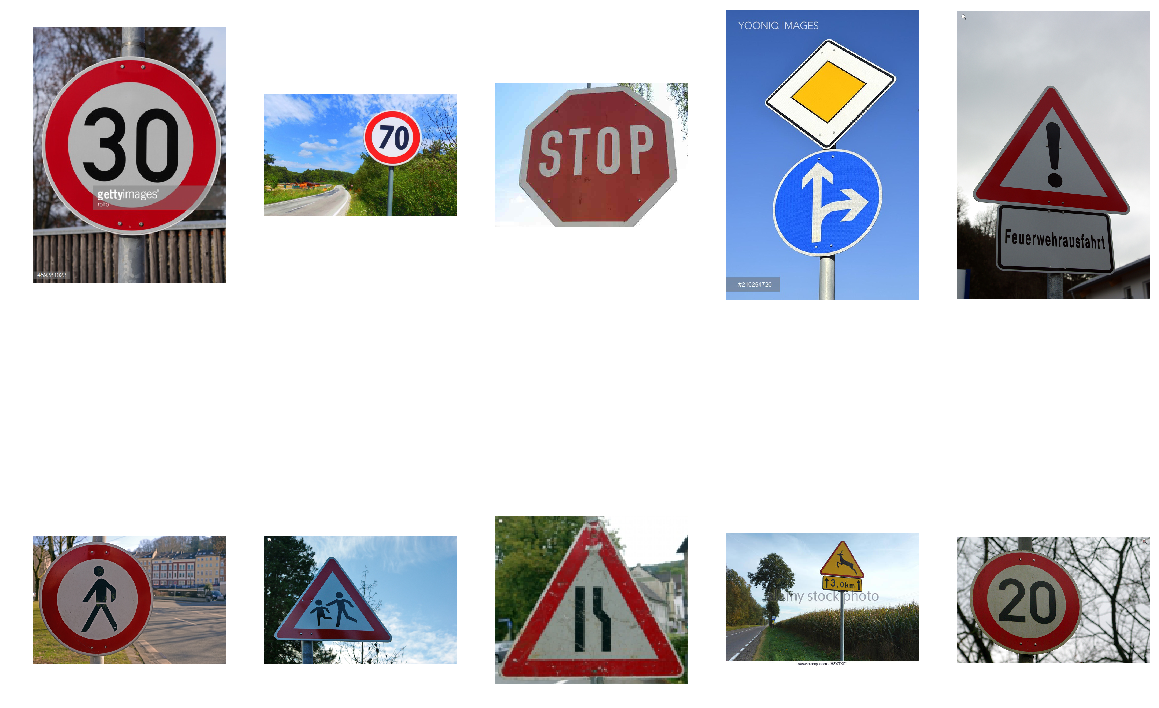

In [58]:
### Load the images and plot them here.
file_names = sorted(os.listdir('traffic-signs-data/test_images/'))
raw_images = np.array([mpimg.imread('traffic-signs-data/test_images/' + name) for name in file_names])
### Feel free to use as many code cells as needed.
fig = plt.figure(figsize=(20,15))
for i in range(1,len(raw_images)+1):
    fig.add_subplot(2, 5, i)
    image = raw_images[i-1]
    implot = plt.imshow(image)
    plt.axis('off')
plt.show()

### Predict the Sign Type for Each Image

In [53]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
images = process_data(raw_images)



In [54]:
labels = [1, 4, 18, 27, 28, 14, 24, 31, 12, 0]

In [55]:
def classify_image(images, imageIndex, conv_keep_probability=conv_keep_probability, fc_keep_probability=fc_keep_probability, labels=labels, signnames=signnames):
    """
    Output the prediction for the input image
    : images: an array of images
    : imageIndex: the index of the image to predict
    : labels: an array of image labels
    : signnames: an array of traffic sign names
    """
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        classification = sess.run(tf.argmax(logits, 1), feed_dict={x: [images[imageIndex]], conv_keep_prob: conv_keep_probability, fc_keep_prob: fc_keep_probability})
        image = images[imageIndex]
        image = np.reshape(image, image.shape[:2])
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        print("The traffic sign is:", signnames[labels[imageIndex]])
        print("The traffic sign is classified as:", signnames[classification][0])

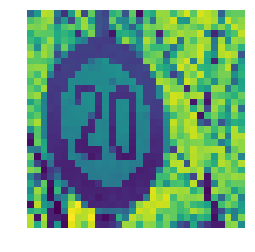

The traffic sign is: Speed limit (30km/h)
The traffic sign is classified as: Roundabout mandatory


In [56]:
classify_image(images, 0)

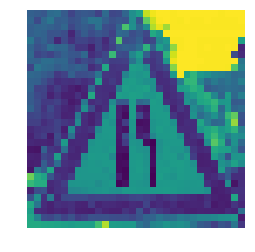

The traffic sign is: Speed limit (70km/h)
The traffic sign is classified as: Road narrows on the right


In [26]:
classify_image(images, 1)

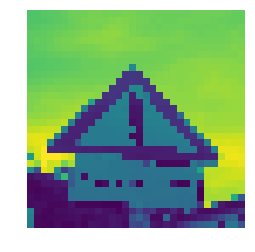

The traffic sign is: General caution
The traffic sign is classified as: Wild animals crossing


In [27]:
classify_image(images, 2)

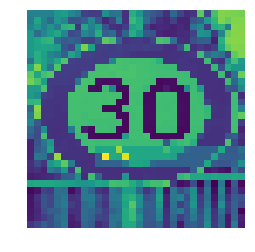

The traffic sign is: Pedestrians
The traffic sign is classified as: Vehicles over 3.5 metric tons prohibited


In [28]:
classify_image(images, 3)

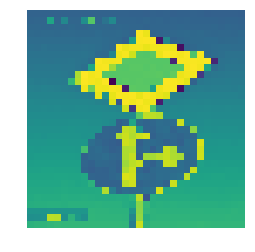

The traffic sign is: Children crossing
The traffic sign is classified as: Right-of-way at the next intersection


In [29]:
classify_image(images, 4)

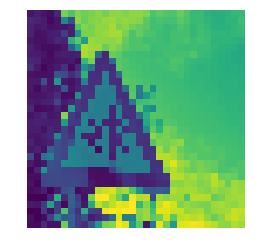

The traffic sign is: Stop
The traffic sign is classified as: Turn right ahead


In [30]:
classify_image(images, 5)

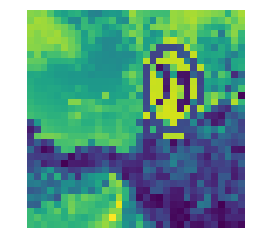

The traffic sign is: Road narrows on the right
The traffic sign is classified as: Speed limit (60km/h)


In [31]:
classify_image(images, 6)

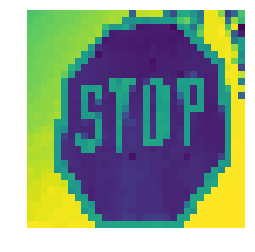

The traffic sign is: Wild animals crossing
The traffic sign is classified as: Stop


In [32]:
classify_image(images, 7)

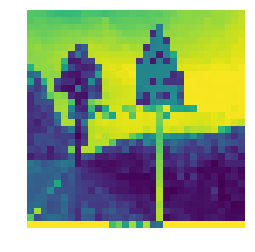

The traffic sign is: Priority road
The traffic sign is classified as: No entry


In [33]:
classify_image(images, 8)

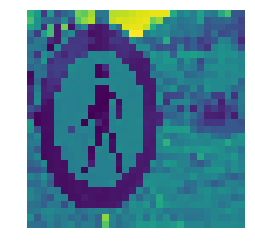

The traffic sign is: Speed limit (20km/h)
The traffic sign is classified as: Go straight or right


In [34]:
classify_image(images, 9)

### Analyze Performance

In [35]:
### Calculate the accuracy for these 10 new images. 
### For example, if the model predicted 1 out of 10 signs correctly, it's 10% accurate on these new images.
def images_acc_test(images, labels):
    """
    Calculate and print out the accuracy of the input images
    : images: images to calculate prediction accuracy
    : labels: labels of the input images
    """
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        test_accuracy = evaluate(images, labels, fc_keep_probability, conv_keep_probability)
        print("Test Accuracy = {:.3f}".format(test_accuracy))

In [36]:
images_acc_test(images, labels)

Test Accuracy = 0.100


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [37]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def top_five_probs(images, imageIndex, signnames=signnames, conv_keep_probability=conv_keep_probability, fc_keep_probability=fc_keep_probability):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        image = images[imageIndex]
        prob = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: [image], conv_keep_prob: conv_keep_probability, fc_keep_prob: fc_keep_probability})
        image = np.reshape(image, image.shape[:2])
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        print("The traffic sign is classified as:\n {0}% {1} \n {2}% {3} \n {4}% {5} \
              \n {6}% {7} \n {8}% {9}".format(\
                                              round(prob.values[0][0]*100,6), signnames[prob.indices[0][0]], \
                                              round(prob.values[0][1]*100,6), signnames[prob.indices[0][1]], \
                                              round(prob.values[0][2]*100,6), signnames[prob.indices[0][2]], \
                                              round(prob.values[0][3]*100,6), signnames[prob.indices[0][3]], \
                                              round(prob.values[0][4]*100,6), signnames[prob.indices[0][4]]))





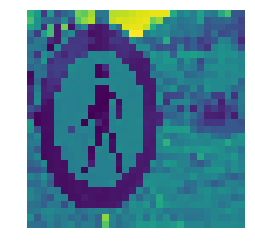

The traffic sign is classified as:
 94.380426% Go straight or right 
 4.53987% Children crossing 
 0.295669% Yield               
 0.256802% Ahead only 
 0.188092% General caution


In [38]:
top_five_probs(images, 9)

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [39]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1,  conv_keep_probability=conv_keep_probability, fc_keep_probability=fc_keep_probability):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        activation = tf_activation.eval(session=sess,feed_dict={x : image_input,  conv_keep_prob : conv_keep_probability, fc_keep_prob : fc_keep_probability})
        featuremaps = activation.shape[3]
        plt.figure(plt_num, figsize=(20,45))
        for featuremap in range(featuremaps):
            plt.subplot(20,5, featuremap+1) # sets the number of feature maps to show on each row and column
            plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
            plt.axis('off')
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min !=-1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

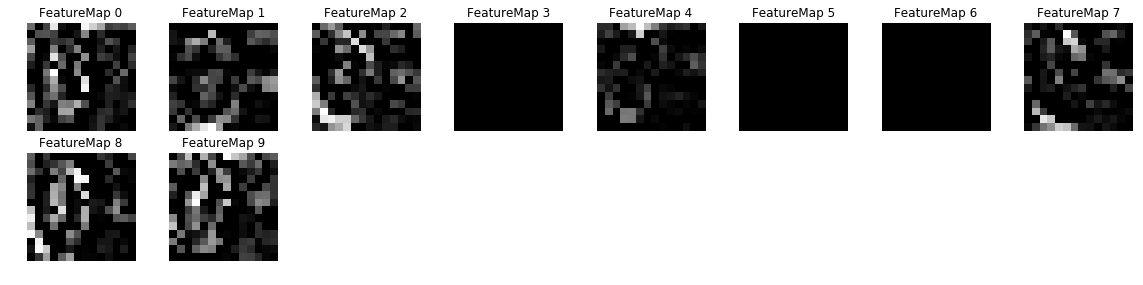

In [40]:
outputFeatureMap([images[9]], conv1)

ValueError: num must be 1 <= num <= 152, not 153

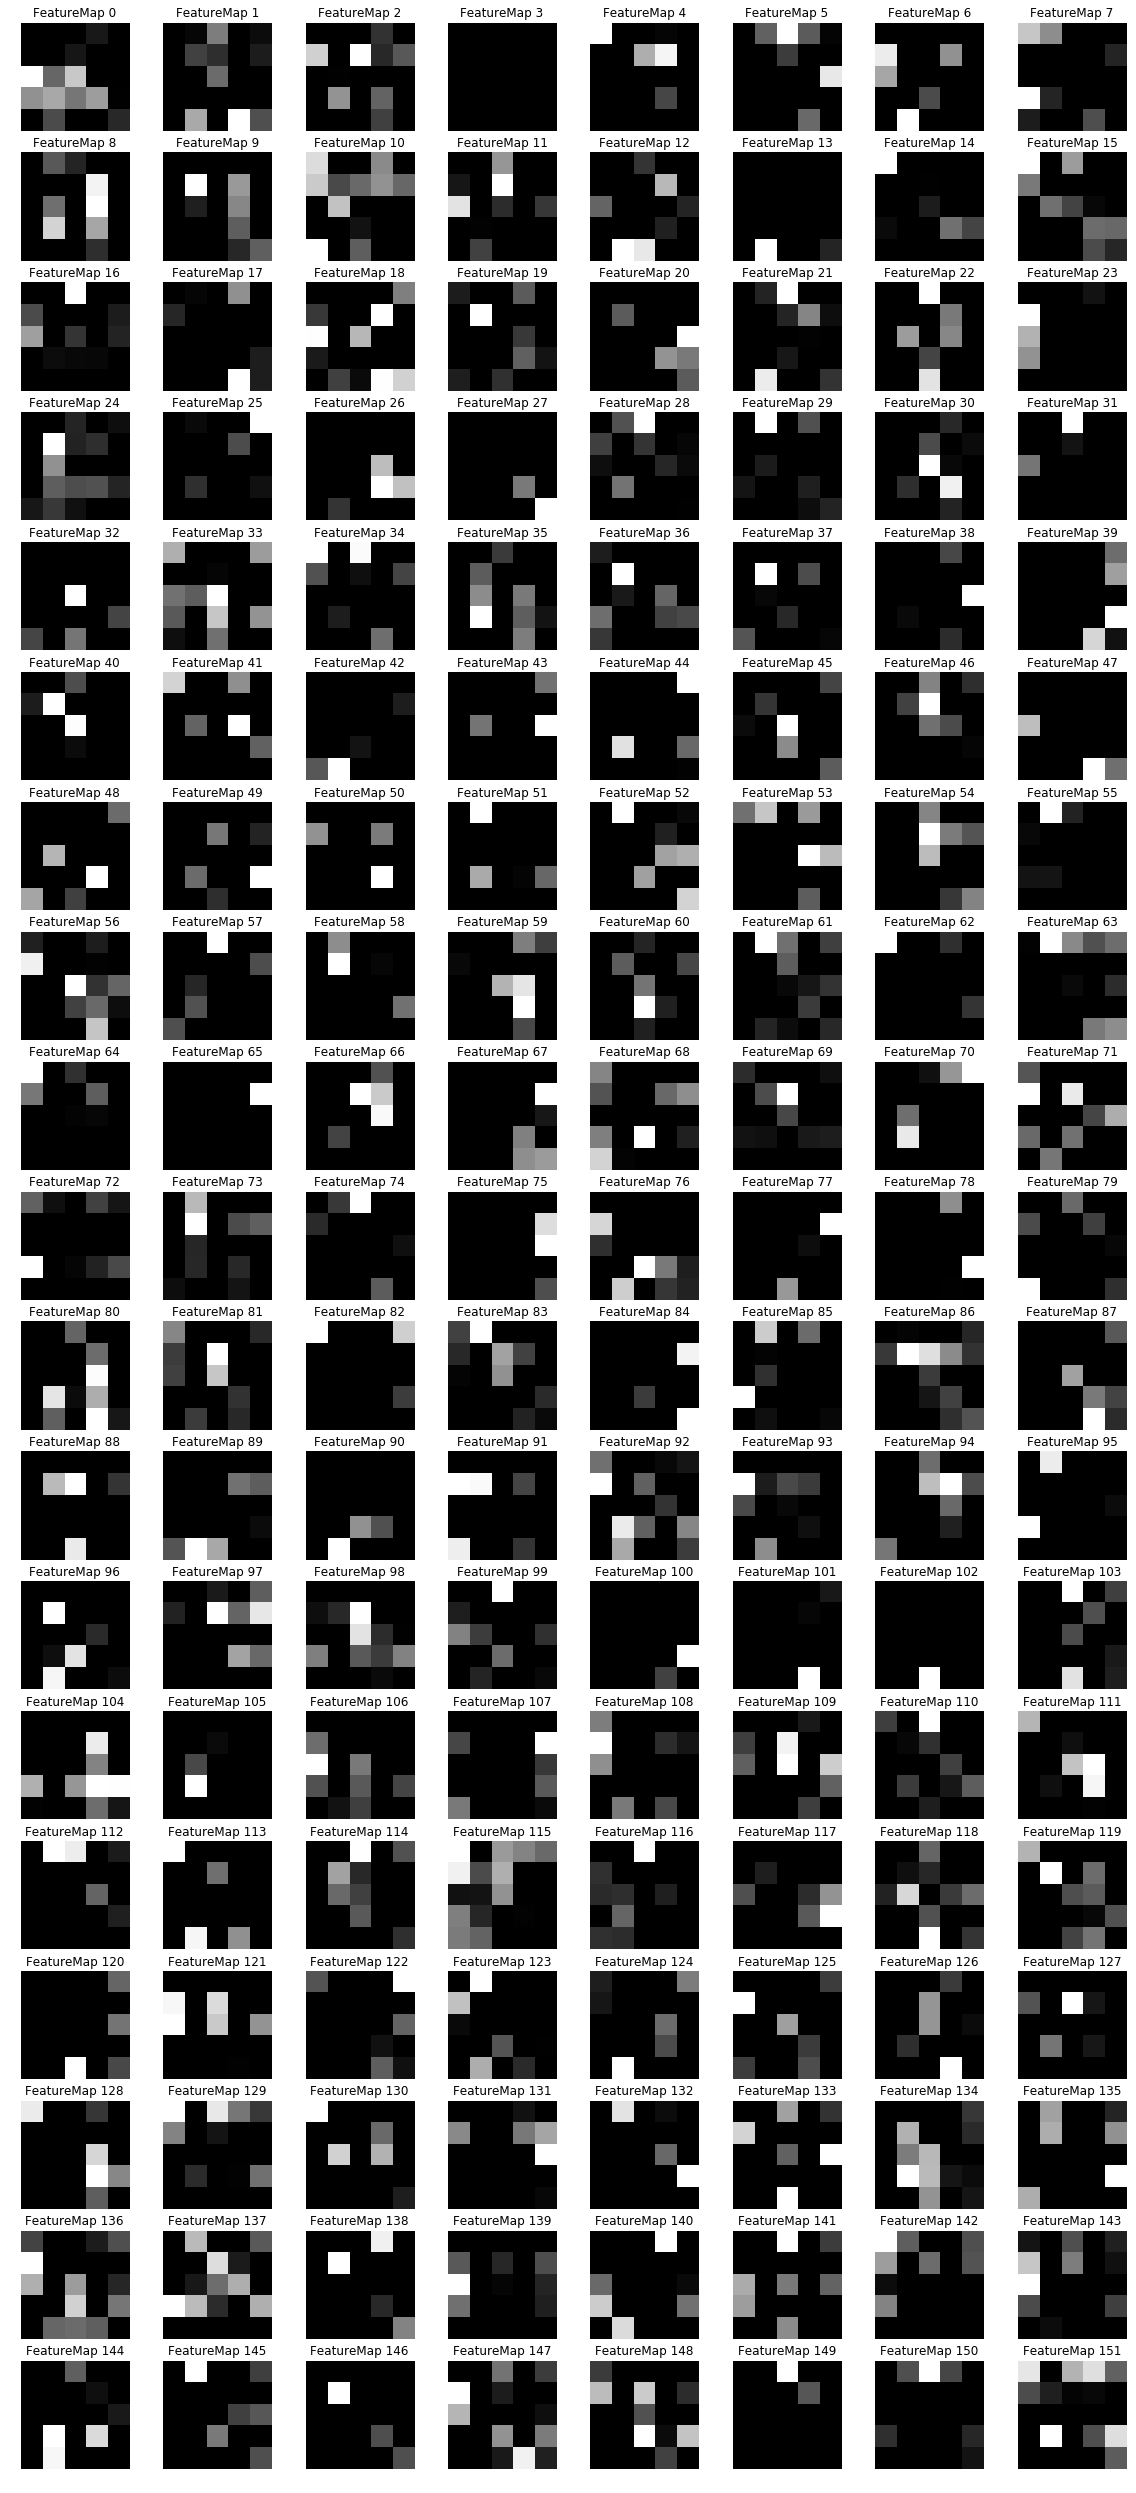

In [41]:
outputFeatureMap([images[9]], conv2)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

The figures showed in the first convnet were so blurry, and there also a few black pictures, so I wondered whether there was something in wrong in my convnet architecture. When I asked one of my classmate on Slack, they suggested that the black pictures indicated that some of the neurons were dead, and helped me figure out the best number of filters for my convnet. I kept track of the output of the function outputFeatureMap and adjusted the output number until all the black images disappeared.